#Experiment from internet -- couldn't apply econml methods on cust_churn data -- throws error -- must figure out

In [1]:
%pip install econml

   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
    --------------------------------------- 0.0/2.0 MB 960.0 kB/s eta 0:00:02
   ---- ----------------------------------- 0.2/2.0 MB 2.5 MB/s eta 0:00:01
   ------------ --------------------------- 0.6/2.0 MB 4.8 MB/s eta 0:00:01
   ------------------------- -------------- 1.2/2.0 MB 7.1 MB/s eta 0:00:01
   ---------------------------------------  1.9/2.0 MB 8.7 MB/s eta 0:00:01
   ---------------------------------------- 2.0/2.0 MB 8.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/447.3 kB ? eta -:--:--
   --------------------------------------- 447.3/447.3 kB 14.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   --------------------- ------------------ 0.7/1.3 MB 23.1 MB/s eta 0:00:01
   ---------------------------------- ----- 1.2/1.3 MB 14.7 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 12.2 MB/s eta 0:00:00
   -------------------

In [1]:
# Required libraries
import dowhy
from dowhy import CausalModel
import dowhy.datasets

# Avoiding unnecessary log messges and warnings
import logging
logging.getLogger("dowhy").setLevel(logging.WARNING)
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Load some sample data
data = dowhy.datasets.linear_dataset(
    beta=10,
    num_common_causes=5,
    num_instruments=2,
    num_samples=10000,
    treatment_is_binary=True,
    stddev_treatment_noise=10)

c:\Users\CB.EN.U4CSE20614\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# I. Create a causal model from the data and domain knowledge.
model = CausalModel(
    data=data["df"],
    treatment=data["treatment_name"],
    outcome=data["outcome_name"],
    common_causes=data["common_causes_names"],
    instruments=data["instrument_names"])

In [27]:
print(data)

{'df':        Z0        Z1        W0        W1        W2        W3        W4     v0  \
0     1.0  0.366158 -1.498233 -1.617294 -0.826063  0.230267  0.908789   True   
1     0.0  0.746876 -0.666144 -1.555959 -0.627108  0.173824  1.552671   True   
2     1.0  0.409732 -0.877542 -1.004345 -1.817378 -0.211230 -0.144339   True   
3     1.0  0.664802  0.128030 -1.734534  0.600561  1.126272  1.862383   True   
4     0.0  0.256210 -0.650546 -1.016715  1.410945  0.515038  0.949367   True   
...   ...       ...       ...       ...       ...       ...       ...    ...   
9995  0.0  0.743470 -0.429523  0.425812 -0.560212 -1.387458  1.805145   True   
9996  0.0  0.903221 -1.224931 -1.314720  1.935975 -0.808194  0.384860   True   
9997  1.0  0.261827 -1.549777 -1.291579 -0.215058 -0.032664 -0.710768   True   
9998  0.0  0.132864 -1.469059 -0.681454  0.522877  2.070848  1.169908   True   
9999  0.0  0.140546 -1.100566 -1.812237 -0.216135 -0.017454  1.425095  False   

              y  propensity_scor

In [11]:
%pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [8]:
%pip install pygraphviz pydot

     ---------------------------------------- 0.0/104.9 kB ? eta -:--:--
     --- ------------------------------------ 10.2/104.9 kB ? eta -:--:--
     ---------- -------------------------- 30.7/104.9 kB 435.7 kB/s eta 0:00:01
     --------------------- --------------- 61.4/104.9 kB 656.4 kB/s eta 0:00:01
     ------------------------------------ 104.9/104.9 kB 860.9 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build pygraphviz
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Building wheel for pygraphviz (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [55 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-cpython-311
      creating build\lib.win-amd64-cpython-311\pygraphviz
      copying pygraphviz\agraph.py -> build\lib.win-amd64-cpython-311\pygraphviz
      copying pygraphviz\graphviz.py -> build\lib.win-amd64-cpython-311\pygraphviz
      copying pygraphviz\scraper.py -> build\lib.win-amd64-cpython-311\pygraphviz
      copying pygraphviz\testing.py -> build\lib.win-amd64-cpython-311\pygraphviz
      copying pygraphviz\__init__.py -> build\lib.win-amd64-cpython-311\pygraphviz
      creating build\lib.win-amd64-cpython-311\pygraphviz\tests
      copying pygraphviz\tests\test_attribute_defaults.py -> build\lib.win-amd64-cpython-311\pygraphviz\tests
      copying pygraphviz\tests\test_clear.py -> build\lib.

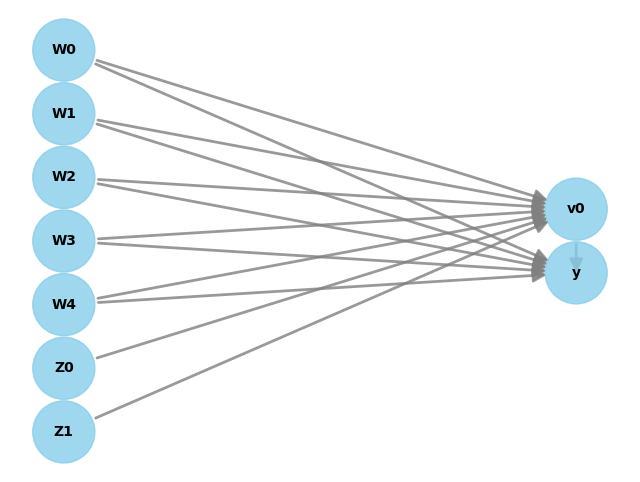

In [5]:
model.view_model() #att-- layout='dot'
from IPython.display import Image, display
#display(Image(filename="causal_model.png"))

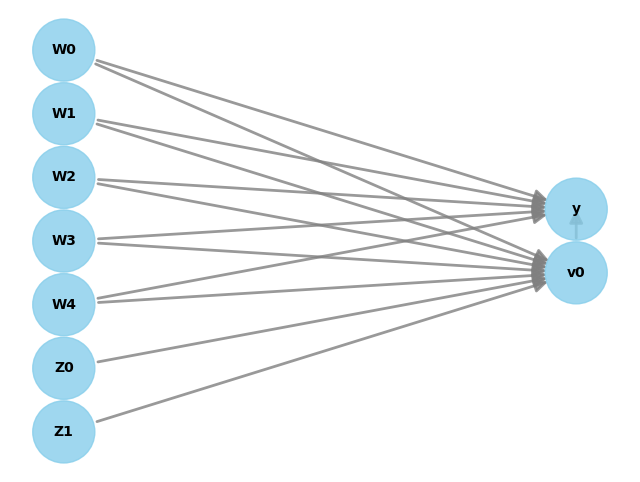

In [8]:
# I. Create a causal model from the data and given graph.
model = CausalModel(
    data=data["df"],
    treatment=data["treatment_name"][0],
    outcome=data["outcome_name"][0],
    graph=data["gml_graph"])
model.view_model()

In [9]:
# II. Identify causal effect and return target estimands
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                       
─────(E[y|W0,W4,W2,W3,W1])
d[v₀]                     
Estimand assumption 1, Unconfoundedness: If U→{v0} and U→y then P(y|v0,W0,W4,W2,W3,W1,U) = P(y|v0,W0,W4,W2,W3,W1)

### Estimand : 2
Estimand name: iv
Estimand expression:
 ⎡                              -1⎤
 ⎢    d        ⎛    d          ⎞  ⎥
E⎢─────────(y)⋅⎜─────────([v₀])⎟  ⎥
 ⎣d[Z₀  Z₁]    ⎝d[Z₀  Z₁]      ⎠  ⎦
Estimand assumption 1, As-if-random: If U→→y then ¬(U →→{Z0,Z1})
Estimand assumption 2, Exclusion: If we remove {Z0,Z1}→{v0}, then ¬({Z0,Z1}→y)

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [10]:
# III. Estimate the target estimand using a statistical method.
propensity_strat_estimate = model.estimate_effect(identified_estimand,
                                 method_name="backdoor.dowhy.propensity_score_stratification")

print(propensity_strat_estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                       
─────(E[y|W0,W4,W2,W3,W1])
d[v₀]                     
Estimand assumption 1, Unconfoundedness: If U→{v0} and U→y then P(y|v0,W0,W4,W2,W3,W1,U) = P(y|v0,W0,W4,W2,W3,W1)

## Realized estimand
b: y~v0+W0+W4+W2+W3+W1
Target units: ate

## Estimate
Mean value: 10.090505644974806



In [11]:
import econml
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LassoCV
from sklearn.ensemble import GradientBoostingRegressor
dml_estimate = model.estimate_effect(identified_estimand,
                                    method_name="backdoor.econml.dml.DML",
                                    method_params={
                                        'init_params': {'model_y':GradientBoostingRegressor(),
                                                        'model_t': GradientBoostingRegressor(),
                                                        'model_final':LassoCV(fit_intercept=False), },
                                        'fit_params': {}
                                     })
print(dml_estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                       
─────(E[y|W0,W4,W2,W3,W1])
d[v₀]                     
Estimand assumption 1, Unconfoundedness: If U→{v0} and U→y then P(y|v0,W0,W4,W2,W3,W1,U) = P(y|v0,W0,W4,W2,W3,W1)

## Realized estimand
b: y~v0+W0+W4+W2+W3+W1 | 
Target units: ate

## Estimate
Mean value: 10.023094932388176
Effect estimates: [[10.02309493]]



In [12]:
# IV. Refute the obtained estimate using multiple robustness checks.
refute_results = model.refute_estimate(identified_estimand, propensity_strat_estimate,
                                       method_name="placebo_treatment_refuter")
print(refute_results)

Refute: Use a Placebo Treatment
Estimated effect:10.090505644974806
New effect:0.0012055500236979766
p value:1.0



EconML

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import dowhy.datasets, dowhy.plotter

   Treatment    Outcome        w0         s        w1
0   5.970952  12.969117  1.478080  4.588055 -1.662688
1   8.000640  16.170309  2.180451  1.651093  0.194199
2   3.011646   6.919958 -1.367424  5.377478 -1.919642
3   3.856434   8.734067 -0.647309  8.831036 -1.749404
4   3.665637   8.497418 -0.159412  8.959742 -2.258618


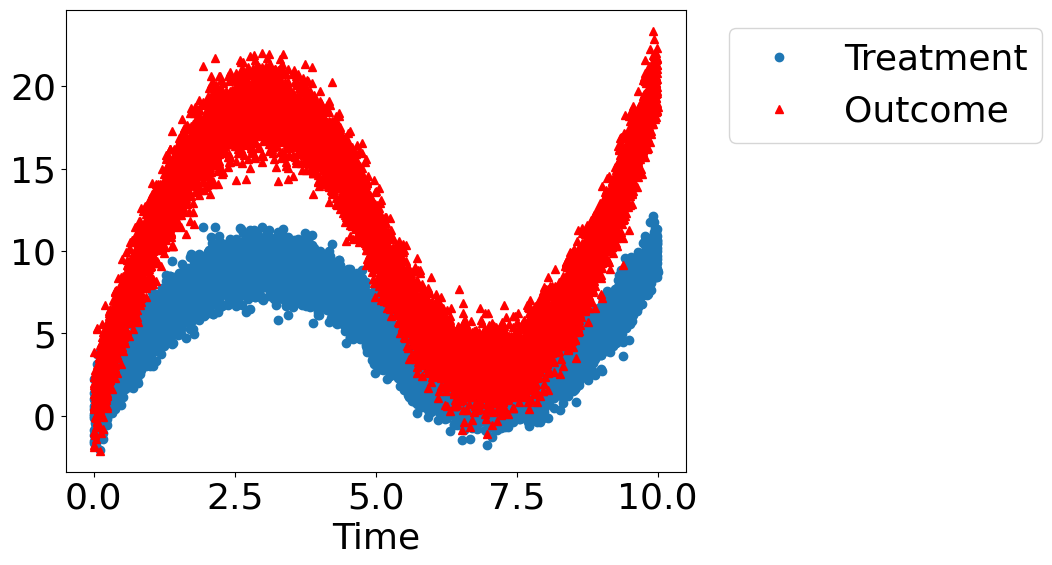

In [20]:
rvar = 1 if np.random.uniform() > 0.2 else 0 # random number between 0 and 1 but greater than 0.2
is_linear = True # A non-linear dataset. Change to True to see results for a linear dataset.
data_dict = dowhy.datasets.xy_dataset(10000, effect=rvar,  #xy_dataset from built-in datasets, effect = rvar
                                      num_common_causes=2, # no of common causes in the datasets
                                      is_linear=is_linear,
                                      sd_error=0.2) # standard deviation
df = data_dict['df']
print(df.head())
dowhy.plotter.plot_treatment_outcome(df[data_dict["treatment_name"]], df[data_dict["outcome_name"]],
                             df[data_dict["time_val"]])

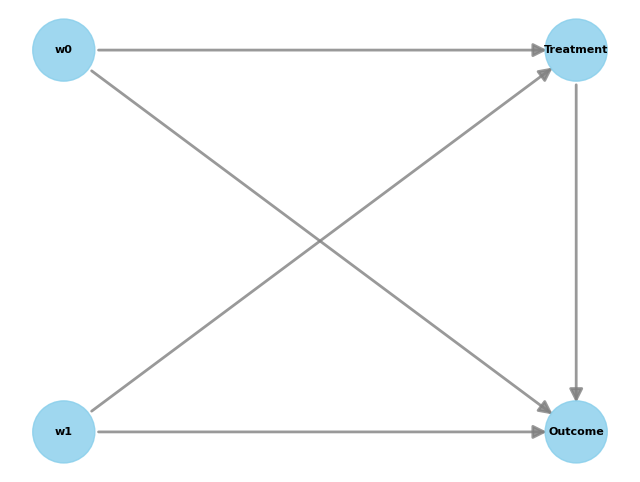

In [21]:
model= CausalModel(
        data=df,
        treatment=data_dict["treatment_name"],
        outcome=data_dict["outcome_name"],
        common_causes=data_dict["common_causes_names"],
        instruments=data_dict["instrument_names"])
model.view_model()

In [22]:
identified_estimand = model.identify_effect()
print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                        
────────────(E[Outcome|w1,w0])
d[Treatment]                  
Estimand assumption 1, Unconfoundedness: If U→{Treatment} and U→Outcome then P(Outcome|Treatment,w1,w0,U) = P(Outcome|Treatment,w1,w0)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                        
────────────(E[Outcome|w1,w0])
d[Treatment]                  
Estimand assumption 1, Unconfoundedness: If U→{Treatment} and U→Outcome then P(Outcome|Treatment,w1,w0,U) = P(Outcome|Treatment,w1,w0)

## Realized estimand
b: Outcome~Treatment+w1+w0
Target units: ate

## Estimate
Mean value: 1.0126409302836876

Causal Estimate is 1.0126409302836876


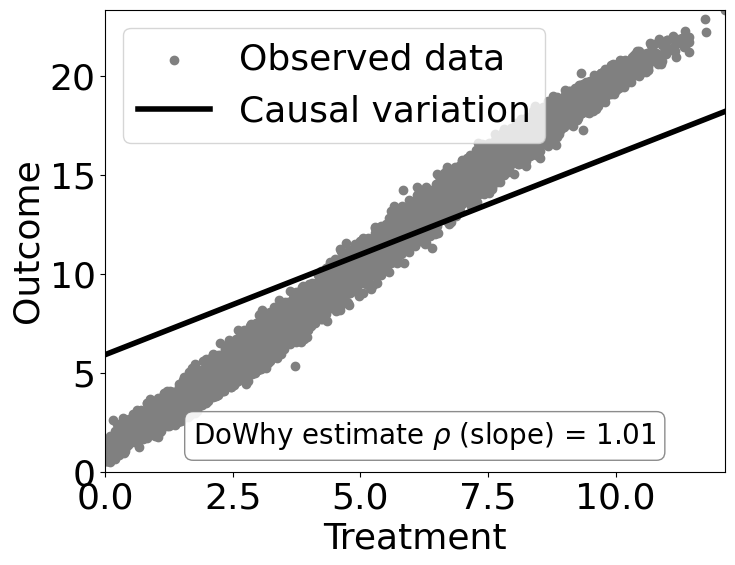

In [23]:
estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.linear_regression")
print(estimate)
print("Causal Estimate is " + str(estimate.value))

# Plot Slope of line between action and outcome = causal effect
dowhy.plotter.plot_causal_effect(estimate, df[data_dict["treatment_name"]], df[data_dict["outcome_name"]])

In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LassoCV
from sklearn.ensemble import GradientBoostingRegressor
dml_estimate = model.estimate_effect(identified_estimand, method_name="backdoor.econml.dml.DML",
                                     control_value = 0,
                                     treatment_value = 1,
                                 confidence_intervals=False,
                                method_params={"init_params":{'model_y':GradientBoostingRegressor(),
                                                              'model_t': GradientBoostingRegressor(),
                                                              "model_final":LassoCV(fit_intercept=False),
                                                              'featurizer':PolynomialFeatures(degree=2, include_bias=True)},
                                               "fit_params":{}})
print(dml_estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                        
────────────(E[Outcome|w1,w0])
d[Treatment]                  
Estimand assumption 1, Unconfoundedness: If U→{Treatment} and U→Outcome then P(Outcome|Treatment,w1,w0,U) = P(Outcome|Treatment,w1,w0)

## Realized estimand
b: Outcome~Treatment+w1+w0 | 
Target units: ate

## Estimate
Mean value: 1.0244412634799949
Effect estimates: [[1.02444126]]



In [25]:
res_random=model.refute_estimate(identified_estimand, dml_estimate, method_name="random_common_cause")
print(res_random)

Refute: Add a random common cause
Estimated effect:1.0244412634799949
New effect:1.0164948625443413
p value:0.3



In [26]:
res_placebo=model.refute_estimate(identified_estimand, dml_estimate,
        method_name="placebo_treatment_refuter", placebo_type="permute",
        num_simulations=20)
print(res_placebo)

Refute: Use a Placebo Treatment
Estimated effect:1.0244412634799949
New effect:0.0002508080724154858
p value:0.3761016729853599

